In [1]:
import os
import time
import soundfile as sf
import madmom
import sklearn
import IPython
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from madmom.audio.filters import LogarithmicFilterbank

from mir_eval.onset import f_measure

In [ ]:
# BRNN

ground_truth = np.load('../../data/interim/Onsets_Val_44K_Processed.npy')

fps = 100
num_thresholds = 100
thresholds = (np.arange(int(num_thresholds+2))/(num_thresholds+2))[1:-1]

pre_avg = np.array([0,1,2,4,7])*0.01
post_avg = np.array([0,1,2,4,7])*0.01
pre_max = np.array([0,1,2,4,7])*0.01
post_max = np.array([0,1,2,4,7])*0.01

f1_scores = np.zeros((len(thresholds),len(pre_avg),len(post_avg),len(pre_max),len(post_max)))
detector = madmom.features.onsets.RNNOnsetProcessor(online=False)
activation_function = detector('../../data/interim/Audio_Val_44K.wav')
min_activation = np.min(activation_function)
max_activation = np.max(activation_function)
activation_function = (activation_function-min_activation)/(max_activation-min_activation)
for b in range(len(thresholds)):
    for c in range(len(pre_avg)):
        for d in range(len(post_avg)):
            for e in range(len(pre_max)):
                for f in range(len(post_max)):
                    threshold = thresholds[b]
                    #print('Method = ' + method + ' | Hop FPS = ' + str(fps) + ' | Threshold = ' + str(threshold))
                    pick_picker = madmom.features.onsets.OnsetPeakPickingProcessor(fps=fps,pre_avg=pre_avg[c],post_avg=post_avg[d],pre_max=pre_max[e],post_max=post_max[f],threshold=threshold)
                    onset_predictions = pick_picker(activation_function)
                    f1_scores[b,c,d,e,f], precision, recall = f_measure(ground_truth, onset_predictions, window=0.3)


indices_max = np.zeros(5)
max_f1 = 0
for b in range(len(thresholds)):
    for c in range(len(pre_avg)):
        for d in range(len(post_avg)):
            for e in range(len(pre_max)):
                for f in range(len(post_max)):
                    if np.mean(f1_scores[b,c,d,e,f])>max_f1:
                        max_f1 = np.mean(f1_scores[b,c,d,e,f])
                        scores_max = f1_scores[b,c,d,e,f]
                        indices_max = np.array([b,c,d,e,f])
print(scores_max)
print(indices_max)

ground_truth = (np.load('../../data/interim/Onsets_Test_44K.npy')-1024)/44100

detector = madmom.features.onsets.RNNOnsetProcessor(online=False)
pick_picker = madmom.features.onsets.OnsetPeakPickingProcessor(fps=fps,pre_avg=pre_avg[int(indices_max[1])],post_avg=post_avg[int(indices_max[2])],pre_max=pre_max[int(indices_max[3])],post_max=post_max[int(indices_max[4])],threshold=thresholds[int(indices_max[0])])
activation_function = detector('../../data/interim/Audio_Test_44K.wav')
activation_function = (activation_function-min_activation)/(max_activation-min_activation)
onset_predictions = pick_picker(activation_function)
f1_score_test, precision, recall = f_measure(ground_truth, onset_predictions, window=0.3)
#print(f1_score_test)

In [ ]:
# CNN

ground_truth = np.load('../../data/interim/Onsets_Val_44K_Processed.npy')

fps = 100
num_thresholds = 100
thresholds = (np.arange(int(num_thresholds+2))/(num_thresholds+2))[1:-1]

pre_avg = np.array([0,1,2,4,7])*0.01
post_avg = np.array([0,1,2,4,7])*0.01
pre_max = np.array([0,1,2,4,7])*0.01
post_max = np.array([0,1,2,4,7])*0.01

f1_scores = np.zeros((len(thresholds),len(pre_avg),len(post_avg),len(pre_max),len(post_max)))
detector = madmom.features.onsets.CNNOnsetProcessor()
activation_function = detector('../../data/interim/Audio_Val_44K.wav')
min_activation = np.min(activation_function)
max_activation = np.max(activation_function)
activation_function = (activation_function-min_activation)/(max_activation-min_activation)
for b in range(len(thresholds)):
    for c in range(len(pre_avg)):
        for d in range(len(post_avg)):
            for e in range(len(pre_max)):
                for f in range(len(post_max)):
                    threshold = thresholds[b]
                    #print('Method = ' + method + ' | Hop FPS = ' + str(fps) + ' | Threshold = ' + str(threshold))
                    pick_picker = madmom.features.onsets.OnsetPeakPickingProcessor(fps=fps,pre_avg=pre_avg[c],post_avg=post_avg[d],pre_max=pre_max[e],post_max=post_max[f],threshold=threshold)
                    onset_predictions = pick_picker(activation_function)
                    f1_scores[b,c,d,e,f], precision, recall = f_measure(ground_truth, onset_predictions, window=0.3)


indices_max = np.zeros(5)
max_f1 = 0
for b in range(len(thresholds)):
    for c in range(len(pre_avg)):
        for d in range(len(post_avg)):
            for e in range(len(pre_max)):
                for f in range(len(post_max)):
                    if np.mean(f1_scores[b,c,d,e,f])>max_f1:
                        max_f1 = np.mean(f1_scores[b,c,d,e,f])
                        scores_max = f1_scores[b,c,d,e,f]
                        indices_max = np.array([b,c,d,e,f])
print(scores_max)
print(indices_max)

ground_truth = (np.load('../../data/interim/Onsets_Test_44K.npy')-1024)/44100

detector = madmom.features.onsets.CNNOnsetProcessor()
pick_picker = madmom.features.onsets.OnsetPeakPickingProcessor(fps=fps,pre_avg=pre_avg[int(indices_max[1])],post_avg=post_avg[int(indices_max[2])],pre_max=pre_max[int(indices_max[3])],post_max=post_max[int(indices_max[4])],threshold=thresholds[int(indices_max[0])])
activation_function = detector('../../data/interim/Audio_Test_44K.wav')
activation_function = (activation_function-min_activation)/(max_activation-min_activation)
onset_predictions = pick_picker(activation_function)
f1_score_test, precision, recall = f_measure(ground_truth, onset_predictions, window=0.3)
#print(f1_score_test)

In [2]:
# Timing Pretrained RNN

audio = np.random.rand(120*44100)
sf.write('../../data/interim/Audio_Timing.wav', audio, 44100)
detector = madmom.features.onsets.RNNOnsetProcessor(online=True)
pick_picker = madmom.features.onsets.OnsetPeakPickingProcessor(fps=100,pre_avg=0,post_avg=0,pre_max=0,post_max=0,threshold=0.73)
Times = np.zeros(20)
for n in range(20):
    start = time.time()
    activation_function = detector('../../data/interim/Audio_Timing.wav')
    activation_function = (activation_function-0)/(1-0)
    onset_predictions = pick_picker(activation_function)
    Times[n] = (time.time()-start)/(len(audio)/44100)
print('Pretrained RNN: ' + str(np.mean(Times)) + ' +- ' + str(np.std(Times)) + '|' + str(np.std(Times)*0.43826932358995874))

Pretrained RNN: 0.025538687109947205 +- 0.002136082739428147|0.00093617953734136


In [180]:
# Online RNN

num_thresholds = 100
ground_truth = (np.load('../../data/interim/Onsets_TrainVal_44K.npy')-1024)/44100
#window_lengths = [0.0058,0.0116,0.0174,0.0232,0.029,0.0348]
window_lengths = np.array([0.0087,0.0145,0.0203,0.0261,0.0319])

pre_avg = np.array([0,1,2,4,7])*0.01
post_avg = np.array([0])
pre_max = np.array([0,1,2,4,7])*0.01
post_max = np.array([0])

thresholds = (np.arange(int(num_thresholds+2))/(num_thresholds+2))[1:-1]
f1_scores = np.zeros((len(window_lengths),len(thresholds),len(pre_avg),len(post_avg),len(pre_max),len(post_max)))
detector = madmom.features.onsets.RNNOnsetProcessor(online=True)
activation_function = detector('../../data/interim/Audio_TrainVal_44K.wav')
min_activation = np.min(activation_function)
max_activation = np.max(activation_function)
activation_function = (activation_function-min_activation)/(max_activation-min_activation)
for b in range(len(thresholds)):
    for c in range(len(pre_avg)):
        for d in range(len(post_avg)):
            for e in range(len(pre_max)):
                for f in range(len(post_max)):
                    threshold = thresholds[b]
                    pick_picker = madmom.features.onsets.OnsetPeakPickingProcessor(fps=100,pre_avg=pre_avg[c],post_avg=post_avg[d],pre_max=pre_max[e],post_max=post_max[f],threshold=threshold)
                    onset_predictions = pick_picker(activation_function)
                    for a in range(len(window_lengths)):
                        window_length = window_lengths[a]
                        f1_scores[a,b,c,d,e,f], precision, recall = f_measure(ground_truth, onset_predictions, window=window_length)
np.save('../../results/f1_scores_rnn_val', f1_scores)

max_f1 = 0
indices_max = np.zeros((len(window_lengths),5))
for a in range(len(window_lengths)):
    for b in range(len(thresholds)):
        for c in range(len(pre_avg)):
            for d in range(len(post_avg)):
                for e in range(len(pre_max)):
                    for f in range(len(post_max)):
                        if np.mean(f1_scores[a,b,c,d,e,f])>max_f1:
                            max_f1 = np.mean(f1_scores[a,b,c,d,e,f])
                            scores_max = f1_scores[a,b,c,d,e,f]
                            indices_max[a] = np.array([b,c,d,e,f])
print(scores_max)
print(indices_max)

ground_truth = (np.load('../../data/interim/Onsets_Test_44K.npy')-1024)/44100
f1_scores_test = np.zeros(len(window_lengths))

pick_picker = madmom.features.onsets.OnsetPeakPickingProcessor(fps=100,pre_avg=pre_avg[int(indices_max[a,1])],post_avg=post_avg[int(indices_max[a,2])],pre_max=pre_max[int(indices_max[a,3])],post_max=post_max[int(indices_max[a,4])],threshold=thresholds[int(indices_max[a,0])])
detector = madmom.features.onsets.RNNOnsetProcessor(online=True)
activation_function = detector('../../data/interim/Audio_Test_44K.wav')
activation_function = (activation_function-min_activation)/(max_activation-min_activation)
onset_predictions = pick_picker(activation_function)
min_values = [[],[],[],[],[],[]]
min_indices = [[],[],[],[],[],[]]
frame_dev_absmeans = np.zeros(len(window_lengths))
frame_dev_absstds = np.zeros(len(window_lengths))
frame_dev_means = np.zeros(len(window_lengths))
frame_dev_stds = np.zeros(len(window_lengths))
for b in range(len(window_lengths)):
    window_length = window_lengths[b]
    f1_scores_test[b], precision, recall = f_measure(ground_truth, onset_predictions, window=window_length)
    for k in range(len(onset_predictions)):
        abs_diff = ground_truth-onset_predictions[k]
        diff = np.abs(abs_diff)
        if diff.argmin() not in min_indices[b]:
            min_indices[b].append(diff.argmin())
        else:
            continue
        min_value = abs_diff[diff.argmin()]
        if abs(min_value)<=window_length:
            min_values[b].append(min_value)
    min_values[b] = np.array(min_values[b])
    frame_dev_absmeans[b] = np.mean(np.abs(min_values[b]))
    frame_dev_absstds[b] = np.std(np.abs(min_values[b]))
    frame_dev_means[b] = np.mean(min_values[b])
    frame_dev_stds[b] = np.std(min_values[b])
print(f1_scores_test)
print(frame_dev_absmeans)
print(frame_dev_absstds)
print(frame_dev_means)
print(frame_dev_stds)

np.save('../../results/f1_scores_rnn_test', f1_scores_test)


/Users/alejandrodelgadoluezas/anaconda3/envs/mip/lib/python3.6/site-packages/mir_eval/onset.py:51: UserWarning: Estimated onsets are empty.
  warnings.warn("Estimated onsets are empty.")


0.897231850803105
[[85.  0.  0.  4.  0.]
 [81.  0.  0.  4.  0.]
 [78.  0.  0.  4.  0.]
 [77.  0.  0.  4.  0.]
 [77.  0.  0.  4.  0.]]
[0.57083333 0.7912037  0.85694444 0.87083333 0.88009259]
[0.0041377  0.00615058 0.00696937 0.00723608 0.00748118]
[0.00251288 0.00394301 0.00471804 0.00510821 0.0055601 ]
[0.0024842  0.00464299 0.00515627 0.00502998 0.00498818]
[0.00415499 0.00564088 0.00665169 0.00729067 0.00787406]


In [179]:
# Main Loop Heuristic Real-Time

#methods = ['superflux','complex_flux','high_frequency_content','spectral_diff','spectral_flux','modified_kullback_leibler','phase_deviation','weighted_phase_deviation','normalized_weighted_phase_deviation','complex_domain','rectified_complex_domain']
methods = ['superflux']

ground_truth = np.load('../../data/interim/Onsets_Val_44K_Processed.npy')

fps = 172
num_thresholds = 100
thresholds = (np.arange(int(num_thresholds+2))/(num_thresholds+2))[1:-1]
#window_lengths = [0.0058,0.0116,0.0174,0.0232,0.029,0.0348]
window_lengths = np.array([0.0087,0.0145,0.0203,0.0261,0.0319])

pre_avg = np.array([0])
post_avg = np.array([0])
pre_max = np.array([0,1,2,4,7])*0.01
post_max = np.array([0])

min_activations = np.zeros(len(methods))
max_activations = np.zeros(len(methods))
f1_scores = np.zeros((len(methods),len(thresholds),len(pre_avg),len(post_avg),len(pre_max),len(post_max),len(window_lengths)))
for a in range(len(methods)):
    method = methods[a]
    detector = madmom.features.onsets.SpectralOnsetProcessor(onset_method=method,fps=fps)
    activation_function = detector('../../data/interim/Audio_Val_44K.wav')
    min_activations[a] = np.min(activation_function)
    max_activations[a] = np.max(activation_function)
    activation_function = (activation_function-min_activations[a])/(max_activations[a]-min_activations[a])
    print('Method = ' + method + ' | FPS = ' + str(fps))
    for b in range(len(thresholds)):
        for c in range(len(pre_avg)):
            for d in range(len(post_avg)):
                for e in range(len(pre_max)):
                    for f in range(len(post_max)):
                        threshold = thresholds[b]
                        #print('Method = ' + method + ' | Hop FPS = ' + str(fps) + ' | Threshold = ' + str(threshold))
                        pick_picker = madmom.features.onsets.OnsetPeakPickingProcessor(fps=fps,pre_avg=pre_avg[c],post_avg=post_avg[d],pre_max=pre_max[e],post_max=post_max[f],threshold=threshold)
                        onset_predictions = pick_picker(activation_function)
                        for g in range(len(window_lengths)):
                            window_length = window_lengths[g]
                            f1_scores[a,b,c,d,e,f,g], precision, recall = f_measure(ground_truth, onset_predictions, window=window_length)
                        #print(f1_scores[a,b,c,d,e,f])
np.save('../../results/f1_scores_heuristic_val', f1_scores)


indices_max = np.zeros((len(methods),5))
for a in range(len(methods)):
    max_f1 = 0
    for b in range(len(thresholds)):
        for c in range(len(pre_avg)):
            for d in range(len(post_avg)):
                for e in range(len(pre_max)):
                    for f in range(len(post_max)):
                        if np.mean(f1_scores[a,b,c,d,e,f])>max_f1:
                            max_f1 = np.mean(f1_scores[a,b,c,d,e,f])
                            scores_max = f1_scores[a,b,c,d,e,f]
                            indices_max[a] = np.array([b,c,d,e,f])
    print(scores_max)
    print(indices_max)


ground_truth = (np.load('../../data/interim/Onsets_Test_44K.npy')-1024)/44100

f1_scores_test = np.zeros((len(methods),len(window_lengths)))
for a in range(len(methods)):
    method = methods[a]
    detector = madmom.features.onsets.SpectralOnsetProcessor(onset_method=method,fps=fps)
    threshold = thresholds[int(indices_max[a,0])]
    print('Method = ' + method + ' | Hop Size = ' + str(fps) + ' | Threshold = ' + str(threshold))
    pick_picker = madmom.features.onsets.OnsetPeakPickingProcessor(fps=fps,pre_avg=pre_avg[int(indices_max[a,1])],post_avg=post_avg[int(indices_max[a,2])],pre_max=pre_max[int(indices_max[a,3])],post_max=post_max[int(indices_max[a,4])],threshold=thresholds[int(indices_max[a,0])])
    activation_function = detector('../../data/interim/Audio_Test_44K.wav')
    activation_function = (activation_function-min_activations[a])/(max_activations[a]-min_activations[a])
    onset_predictions = pick_picker(activation_function)
    min_values = [[],[],[],[],[],[]]
    min_indices = [[],[],[],[],[],[]]
    frame_dev_absmeans = np.zeros(len(window_lengths))
    frame_dev_absstds = np.zeros(len(window_lengths))
    frame_dev_means = np.zeros(len(window_lengths))
    frame_dev_stds = np.zeros(len(window_lengths))
    for b in range(len(window_lengths)):
        window_length = window_lengths[b]
        f1_scores_test[a,b], precision, recall = f_measure(ground_truth, onset_predictions, window=window_length)
        for k in range(len(onset_predictions)):
            abs_diff = ground_truth-onset_predictions[k]
            diff = np.abs(abs_diff)
            if diff.argmin() not in min_indices[b]:
                min_indices[b].append(diff.argmin())
            else:
                continue
            min_value = abs_diff[diff.argmin()]
            if abs(min_value)<=window_length:
                min_values[b].append(min_value)
        min_values[b] = np.array(min_values[b])
        frame_dev_absmeans[b] = np.mean(np.abs(min_values[b]))
        frame_dev_absstds[b] = np.std(np.abs(min_values[b]))
        frame_dev_means[b] = np.mean(min_values[b])
        frame_dev_stds[b] = np.std(min_values[b])
    print(f1_scores_test[a])
    print(frame_dev_absmeans)
    print(frame_dev_absstds)
    print(frame_dev_means)
    print(frame_dev_stds)
np.save('../../results/f1_scores_heuristic_test', f1_scores_test)

Method = superflux | FPS = 172
[0.58644364 0.80539259 0.84084384 0.85632256 0.86580951]
[[4. 0. 0. 4. 0.]]
Method = superflux | Hop Size = 172 | Threshold = 0.049019607843137254
[0.52494062 0.74916865 0.81235154 0.83990499 0.85320665]
[0.00441936 0.00643787 0.00723684 0.00777749 0.00809554]
[0.00244783 0.0038225  0.00460308 0.00537201 0.00591216]
[0.00196956 0.00337044 0.00305575 0.00227552 0.00180352]
[0.00465225 0.00668564 0.0080139  0.00917441 0.00986097]


In [3]:
# Timing Heuristic

detector = madmom.features.onsets.SpectralOnsetProcessor(onset_method='superflux',fps=172)
audio = np.random.rand(120*44100)
sf.write('../../data/interim/Audio_Timing.wav', audio, 44100)
pick_picker = madmom.features.onsets.OnsetPeakPickingProcessor(fps=172,pre_avg=0,post_avg=0,pre_max=0,post_max=0,threshold=0.73)
Times = np.zeros(20)
for n in range(20):
    start = time.time()
    activation_function = detector('../../data/interim/Audio_Timing.wav')
    activation_function = (activation_function-0)/(1-0)
    onset_predictions = pick_picker(activation_function)
    Times[n] = (time.time()-start)/(len(audio)/44100)
print('Heuristic: ' + str(np.mean(Times)) + ' +- ' + str(np.std(Times)) + '|' + str(np.std(Times)*0.43826932358995874))

Pretrained RNN: 0.012003284096717835 +- 0.00023101871328673883|0.00010124841520880164


In [ ]:
# Results

'''Method = superflux | Hop Size = 172 | Threshold = 0.058823529411764705
[0.27987132 0.52481618 0.64154412 0.67463235 0.69255515 0.70909926]
Method = complex_flux | Hop Size = 172 | Threshold = 0.049019607843137254
[0.23186951 0.51543287 0.69912171 0.74228356 0.76135508 0.77139272]
Method = high_frequency_content | Hop Size = 172 | Threshold = 0.00980392156862745
[0.20654545 0.35083636 0.42152727 0.45003636 0.47301818 0.48378182]
Method = spectral_diff | Hop Size = 172 | Threshold = 0.00980392156862745
[0.16273079 0.28638901 0.33791327 0.37312151 0.40704165 0.43752684]
Method = spectral_flux | Hop Size = 172 | Threshold = 0.06862745098039216
[0.23128084 0.42952156 0.51920189 0.55009655 0.57240935 0.59171852]
Method = modified_kullback_leibler | Hop Size = 172 | Threshold = 0.029411764705882353
[0.05863343 0.17497692 0.50646353 0.80747922 0.85133887 0.86057248]
Method = phase_deviation | Hop Size = 172 | Threshold = 0.5686274509803921
[0.02423019 0.10550227 0.29076224 0.545684   0.59212519 0.60979303]
Method = weighted_phase_deviation | Hop Size = 172 | Threshold = 0.0196078431372549
[0.15426415 0.30037736 0.38822642 0.42596226 0.45464151 0.46822642]
Method = normalized_weighted_phase_deviation | Hop Size = 172 | Threshold = 0.20588235294117646
[0.0502552  0.14134276 0.30585002 0.44130349 0.47192776 0.48920298]
Method = complex_domain | Hop Size = 172 | Threshold = 0.00980392156862745
[0.1536137  0.28909595 0.36414002 0.39939562 0.42533367 0.43918408]
Method = rectified_complex_domain | Hop Size = 172 | Threshold = 0.029411764705882353
[0.19860627 0.37839721 0.47142857 0.5087108  0.53797909 0.55400697]'''

In [11]:
import numpy as np
print(np.mean(np.array([0.00288315428683453,0.0028729072328948758,0.0028610301263409564,0.002822199918223935,0.0027370208484062196])))
print(np.mean(np.array([0.004346377809563238,0.004555814613488154,0.004613346996483069,0.004427710683653653,0.004490685752737571])))
print(np.mean(np.array([0.0009372482975680159,0.000576948414423768,0.0006752741913008689,0.0007642838556102559,0.0006141898635763203])))
print(np.mean(np.array([0.005130803478390291,0.0053550138457697585,0.0053863223687737865,0.0051947381516894,0.0052230558551417585])))
print(np.mean(np.array([0.9588447653429601,0.9604790419161677,0.9595015576323987,0.9573754789272031,0.9567307692307693])))
print(np.std(np.array([0.9588447653429601,0.9604790419161677,0.9595015576323987,0.9573754789272031,0.9567307692307693])))
print(np.mean(np.array([0.9563130100816131,0.953399904897765,0.9528795811518325,0.9500950570342205,0.9530651340996169])))
print(np.std(np.array([0.9563130100816131,0.953399904897765,0.9528795811518325,0.9500950570342205,0.9530651340996169])))
print(np.mean(np.array([0.9613899613899614,0.9676640926640927,0.9662162162162162,0.9647683397683398,0.9604247104247104])))
print(np.std(np.array([0.9613899613899614,0.9676640926640927,0.9662162162162162,0.9647683397683398,0.9604247104247104])))

0.002835262482540103
0.004486787171185137
0.0007135889244958458
0.005257986739952999
0.9585863226098998
0.001370843166210413
0.9531505374530097
0.0019738332699948107
0.9640926640926641
0.0027741520971428517


In [10]:
print(np.mean(np.array([0.0026568194434438076,0.0026107564393335224,0.002682854079507532,0.0026268384448802583,0.002723291745853056])))
print(np.mean(np.array([0.00439260857846578,0.004412290520932872,0.004549556876915562,0.004318708815970191,0.0044632484194403865])))
print(np.mean(np.array([0.0002206660667231007,0.0003423454851947958,-7.66529737077548e-05,0.0002446998775733932,0.0007079970989667356])))
print(np.mean(np.array([0.0051288406258792225,0.005115384286190262,0.0052811265947562405,0.005048925432461361,0.0051803131656805446])))
print(np.mean(np.array([0.9624671288548888,0.9555079704972638,0.9576593720266413,0.9619344026813503,0.9622009569377991])))
print(np.std(np.array([0.9624671288548888,0.9555079704972638,0.9576593720266413,0.9619344026813503,0.9622009569377991])))
print(np.mean(np.array([0.9535765040265277,0.9422806194274989,0.9441838649155723,0.9543942992874109,0.9539848197343453])))
print(np.std(np.array([0.9535765040265277,0.9422806194274989,0.9441838649155723,0.9543942992874109,0.9539848197343453])))
print(np.mean(np.array([0.9715250965250966,0.9691119691119691,0.9715250965250966,0.9695945945945946,0.9705598455598455])))
print(np.std(np.array([0.9715250965250966,0.9691119691119691,0.9715250965250966,0.9695945945945946,0.9705598455598455])))

0.0026601120306036356
0.004427282642344958
0.00028781111095005406
0.005150918020993526
0.9599539661995886
0.0028396874043283915
0.9496840214782709
0.005308428905180636
0.9704633204633206
0.0009843667014658084


In [9]:
2*(0.975*0.956)/(0.975+0.956)

0.9654065251165198

In [14]:
0.8765386471799175*.004

0.00350615458871967

In [42]:
1.96/(20**0.5)

0.43826932358995874

In [ ]:
# Final results

heuristic = np.array([0.05863343, 0.17497692, 0.50646353, 0.80747922, 0.85133887, 0.86057248])
pretrained_rnn = np.array([0.36592179, 0.67318436, 0.83845438, 0.87430168, 0.88361266, 0.891527])
rnn_005 = np.array([0.42688296639629203,0.7272727272727273,0.7885891198584697,0.8023152270703472,0.8156599552572706,0.8196868008948547])
rnn_010 = np.array([0.33646652599271054,0.7069340420391399,0.8534606205250596,0.8637015781922525,0.8725279961877532,0.8758045292014303])
rnn_015 = np.array([0.2605731599545512,0.5533696107157806,0.8779083713120652,0.8873004527043127,0.8947619047619048,0.896551724137931])
rnn_020 = np.array([0.20417808866622555,0.4224510129525075,0.8719068413391559,0.8869480834546337,0.8945952555637076,0.8990960175910091])
rnn_025 = np.array([0.17564083118458973,0.34714003944773175,0.8662207357859532,0.8884068450228972,0.9042164270046309,0.9082078678970374])
rnn_030 = np.array([0.15185924631894185,0.2926230282421838,0.8524061708496431,0.8813799621928166,0.906653901388224,0.9153350822799905])

In [ ]:
# Final results

heuristic = np.array([0.26757812, 0.6328125, 0.82666016, 0.86230469, 0.87890625, 0.88769531])
pretrained_rnn = np.array([0.36592179, 0.67318436, 0.83845438, 0.87430168, 0.88361266, 0.891527])
rnn_005 = np.array([0.4371311847480708,0.7272727272727273,0.7885891198584697,0.8023152270703472,0.8156599552572706,0.8196868008948547])
rnn_010 = np.array([0.33646652599271054,0.7069340420391399,0.8534606205250596,0.8637015781922525,0.8725279961877532,0.8758045292014303])
rnn_015 = np.array([0.2605731599545512,0.5533696107157806,0.8779083713120652,0.8873004527043127,0.8947619047619048,0.896551724137931])
rnn_020 = np.array([0.20417808866622555,0.4224510129525075,0.8719068413391559,0.8869480834546337,0.8945952555637076,0.8990960175910091])
rnn_025 = np.array([0.17564083118458973,0.34714003944773175,0.8662207357859532,0.8884068450228972,0.9042164270046309,0.9082078678970374])
rnn_030 = np.array([0.15185924631894185,0.2926230282421838,0.8524061708496431,0.8813799621928166,0.906653901388224,0.9153350822799905])

In [36]:
# Final results

heuristic = np.array([0.52494062, 0.74916865, 0.81235154, 0.83990499, 0.85320665])
pretrained_rnn = np.array([0.57083333, 0.7912037, 0.85694444, 0.87083333, 0.88009259])
rnn_1 = np.array([0.72166391, 0.77351214, 0.80138417, 0.82226639, 0.83372582])
rnn_1_std = np.array([0.00620953, 0.00605317, 0.00639005, 0.00631918, 0.00684463])
rnn_2 = np.array([0.79306854, 0.84655434, 0.86464618, 0.87755293, 0.88421926])
rnn_2_std = np.array([0.00622342, 0.00631729, 0.0073642 , 0.00503181, 0.00416101])
rnn_3 = np.array([0.8064462 , 0.87119978, 0.88835854, 0.89561121, 0.90043837])
rnn_3_std = np.array([0.00189271, 0.00260644, 0.00290245, 0.00291908, 0.00246246])
rnn_4 = np.array([0.80173272, 0.87748896, 0.89890082, 0.9064987 , 0.91005135])
rnn_4_std = np.array([0.00421504, 0.00254252, 0.00343207, 0.00257516, 0.00224017])
rnn_5 = np.array([0.79399854, 0.87732829, 0.90533347, 0.91339533, 0.91687235])
rnn_5_std = np.array([0.00406318, 0.00232549, 0.00265409, 0.00252334, 0.00222271])
rnn_6 = np.array([0.78884637, 0.87353187, 0.90458932, 0.91449541, 0.92054964])
rnn_6_std = np.array([0.00399918, 0.00543664, 0.00314439, 0.00279271, 0.00291753])

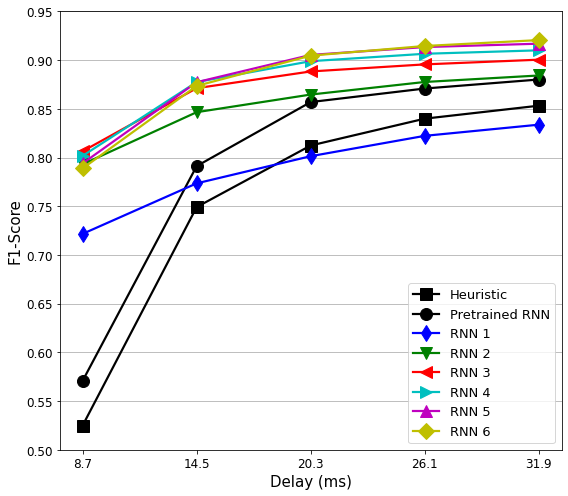

In [128]:
# Plot all

#x = np.array([2.9,8.7,14.5,20.3,26.1,31.9])
x = np.array([8.7,14.5,20.3,26.1,31.9])
markersize = 12
linewidth = 2.2

plt.figure(figsize=(8,7))
plt.plot(x, heuristic, 'ks-', markersize=markersize, linewidth=linewidth, label='Heuristic')
plt.plot(x, pretrained_rnn, 'ko-', markersize=markersize, linewidth=linewidth, label='Pretrained RNN')
plt.plot(x, rnn_1, 'bd-', markersize=markersize, linewidth=linewidth, label='RNN 1')
plt.plot(x, rnn_2, 'gv-', markersize=markersize, linewidth=linewidth, label='RNN 2')
plt.plot(x, rnn_3, 'r<-', markersize=markersize, linewidth=linewidth, label='RNN 3')
plt.plot(x, rnn_4, 'c>-', markersize=markersize, linewidth=linewidth, label='RNN 4')
plt.plot(x, rnn_5, 'm^-', markersize=markersize, linewidth=linewidth, label='RNN 5')
plt.plot(x, rnn_6, 'yD-', markersize=markersize, linewidth=linewidth, label='RNN 6')
plt.xlabel('Delay (ms)', fontsize=15)
plt.ylabel('F1-Score', fontsize=15)
plt.yticks([0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95], fontsize=12)
plt.xticks(x.tolist(), fontsize=12)
plt.legend(loc='lower right', prop={'size': 13})
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('../../results/fig_online_onset_detection.pdf', format='pdf')
plt.show()

plt.close()

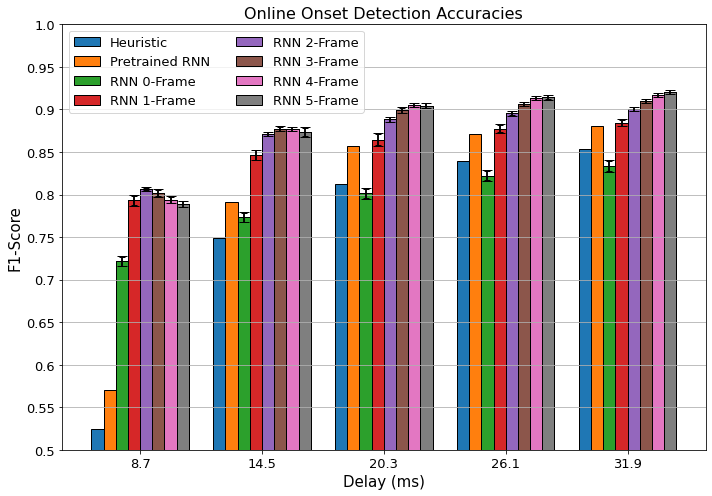

In [37]:
labels = ['8.7', '14.5', '20.3', '26.1', '31.9']

x = np.arange(len(labels))  # the label locations
width = 0.10  # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
rects0 = ax.bar(x - 7*(width/2), heuristic, width, edgecolor = "black", label='Heuristic')
rects00 = ax.bar(x - 5*(width/2), pretrained_rnn, width, edgecolor = "black", label='Pretrained RNN')
rects1 = ax.bar(x - 3*(width/2), rnn_1, width, edgecolor = "black", yerr=rnn_1_std, ecolor='black', capsize=5)
rects2 = ax.bar(x - width/2, rnn_2, width, edgecolor = "black", yerr=rnn_2_std, ecolor='black', capsize=5)
rects3 = ax.bar(x + width/2, rnn_3, width, edgecolor = "black", yerr=rnn_3_std, ecolor='black', capsize=5)
rects4 = ax.bar(x + 3*(width/2), rnn_4, width, edgecolor = "black", yerr=rnn_4_std, ecolor='black', capsize=5)
rects5 = ax.bar(x + 5*(width/2), rnn_5, width, edgecolor = "black", yerr=rnn_5_std, ecolor='black', capsize=5)
rects6 = ax.bar(x + 7*(width/2), rnn_6, width, edgecolor = "black", yerr=rnn_6_std, ecolor='black', capsize=5)

rects000 = ax.bar(x, np.zeros(5))
rects0 = ax.bar(x, np.zeros(5))
rects00 = ax.bar(x, np.zeros(5))
rects0000 = ax.bar(x, np.zeros(5))

rects11 = ax.bar(x - 3*(width/2), rnn_1, width, yerr=rnn_1_std*0.8765386471799175, ecolor='black', edgecolor = "black", capsize=3, label='RNN 0-Frame')
rects21 = ax.bar(x - width/2, rnn_2, width, yerr=rnn_2_std*0.8765386471799175, ecolor='black', edgecolor = "black", capsize=3, label='RNN 1-Frame')
rects31 = ax.bar(x + width/2, rnn_3, width, yerr=rnn_3_std*0.8765386471799175, ecolor='black', edgecolor = "black", capsize=3, label='RNN 2-Frame')
rects41 = ax.bar(x + 3*(width/2), rnn_4, width, yerr=rnn_4_std*0.8765386471799175, ecolor='black', edgecolor = "black", capsize=3, label='RNN 3-Frame')
rects51 = ax.bar(x + 5*(width/2), rnn_5, width, yerr=rnn_5_std*0.8765386471799175, ecolor='black', edgecolor = "black", capsize=3, label='RNN 4-Frame')
rects61 = ax.bar(x + 7*(width/2), rnn_6, width, yerr=rnn_6_std*0.8765386471799175, ecolor='black', edgecolor = "black", capsize=3, label='RNN 5-Frame')

ax.set_ylabel('F1-Score', fontsize=15)
ax.set_xlabel('Delay (ms)', fontsize=15)
ax.set_title('Online Onset Detection Accuracies', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=13)
ax.set_yticks([0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1])
ax.set_yticklabels(np.array([0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]).astype(str), fontsize=13)
ax.set_ylim([0.5,1])
ax.grid(axis='y')
ax.legend(loc='upper left', prop={'size': 13}, ncol=2)
fig.tight_layout()
plt.savefig('../../results/fig_online_onset_detection_accuracies.pdf', format='pdf')
plt.show()

In [38]:
# Final results

heuristic = np.array([0.00441936, 0.00643787, 0.00723684, 0.00777749, 0.00809554])
heuristic_std = np.array([0.00244783, 0.0038625, 0.00440308, 0.00537201, 0.00591216])+0.0029
pretrained_rnn = np.array([0.0041377, 0.00615058, 0.00696937, 0.00723608, 0.00748118])
pretrained_rnn_std = np.array([0.00251288, 0.00394301, 0.00471804, 0.00510821, 0.0055601])+0.0029
rnn_1 = np.array([0.0015723679456523094, 0.0011847752283503513, 0.0005266543539015391, 8.44082951444185e-05, -0.0003130695639833715])
rnn_1_std = np.array([0.003518855633078932, 0.0046638728943612885, 0.005853604618112725, 0.006822158668148025, 0.007703865141967333])+0.0029
rnn_2 = np.array([0.002439267963069529, 0.002413309893237648, 0.0020290993803720805, 0.0017216712928348461, 0.0015493741980695866])
rnn_2_std = np.array([0.003306502194792557, 0.004319785529331709, 0.005148581633604873, 0.005913859982547588, 0.00660675637653749])+0.0029
rnn_3 = np.array([0.002666655060395027, 0.002956599757553613, 0.0027828390877272947, 0.0026395565044559353, 0.0022795845887739665])
rnn_3_std = np.array([0.0033099884435448187, 0.004236189814249931, 0.0049642610597706305, 0.005410293047100478, 0.006073499230025892])+0.0029
rnn_4 = np.array([0.002723420130683083, 0.0032806301183884706, 0.003236618678470795, 0.0028515156770840167, 0.002773167172482037])
rnn_4_std = np.array([0.0033218260817473107, 0.004273705973986688, 0.004976941327430027, 0.005725699752497929, 0.006069673739067614])+0.0029
rnn_5 = np.array([0.0026831947593767506, 0.0033392122280926817, 0.003417951307498811, 0.0031698717222656044, 0.0031380916069640467])
rnn_5_std = np.array([0.003314608658305408, 0.004249976829637396, 0.005152311269639079, 0.005760811250518945, 0.006112217562003679])+0.0029
rnn_6 = np.array([0.002685451028734476, 0.0030926287423099666, 0.003588597707463172, 0.003686473665072396, 0.0036580693550497772])
rnn_6_std = np.array([0.0033075584634552424, 0.004383003324937332, 0.005162117527414502, 0.005718811000122184, 0.006248822057598925])+0.0029

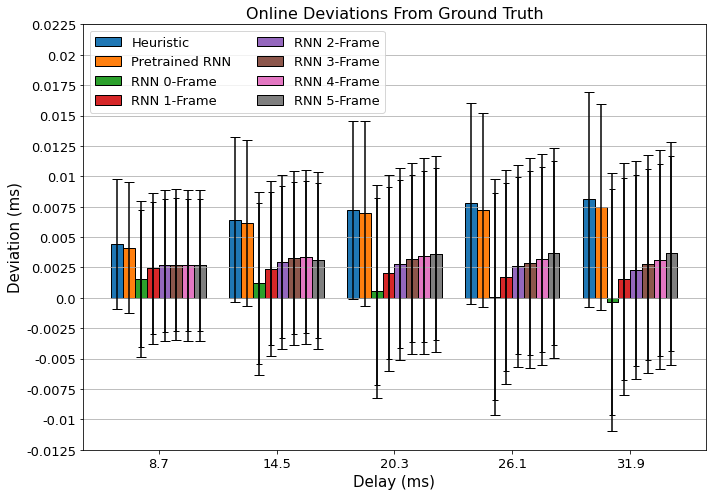

In [39]:
labels = ['8.7', '14.5', '20.3', '26.1', '31.9']

x = np.arange(len(labels))  # the label locations
width = 0.10  # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
rects0 = ax.bar(x - 7*(width/2), heuristic, width, yerr=heuristic_std, ecolor='black', edgecolor = "black", capsize=5, label='Heuristic')
rects00 = ax.bar(x - 5*(width/2), pretrained_rnn, width, yerr=pretrained_rnn_std, ecolor='black', edgecolor = "black", capsize=5, label='Pretrained RNN')
rects1 = ax.bar(x - 3*(width/2), rnn_1, width, yerr=rnn_1_std, ecolor='black', edgecolor = "black", capsize=5)
rects2 = ax.bar(x - width/2, rnn_2, width, yerr=rnn_2_std, ecolor='black', edgecolor = "black", capsize=5)
rects3 = ax.bar(x + width/2, rnn_3, width, yerr=rnn_3_std, ecolor='black', edgecolor = "black", capsize=5)
rects4 = ax.bar(x + 3*(width/2), rnn_4, width, yerr=rnn_4_std, ecolor='black', edgecolor = "black", capsize=5)
rects5 = ax.bar(x + 5*(width/2), rnn_5, width, yerr=rnn_5_std, ecolor='black', edgecolor = "black", capsize=5)
rects6 = ax.bar(x + 7*(width/2), rnn_6, width, yerr=rnn_6_std, ecolor='black', edgecolor = "black", capsize=5)

rects000 = ax.bar(x, np.zeros(5))
rects0 = ax.bar(x, np.zeros(5))
rects00 = ax.bar(x, np.zeros(5))
rects0000 = ax.bar(x, np.zeros(5))

rects11 = ax.bar(x - 3*(width/2), rnn_1, width, yerr=rnn_1_std*0.8765386471799175, ecolor='black', edgecolor = "black", capsize=3, label='RNN 0-Frame')
rects21 = ax.bar(x - width/2, rnn_2, width, yerr=rnn_2_std*0.8765386471799175, ecolor='black', edgecolor = "black", capsize=3, label='RNN 1-Frame')
rects31 = ax.bar(x + width/2, rnn_3, width, yerr=rnn_3_std*0.8765386471799175, ecolor='black', edgecolor = "black", capsize=3, label='RNN 2-Frame')
rects41 = ax.bar(x + 3*(width/2), rnn_4, width, yerr=rnn_4_std*0.8765386471799175, ecolor='black', edgecolor = "black", capsize=3, label='RNN 3-Frame')
rects51 = ax.bar(x + 5*(width/2), rnn_5, width, yerr=rnn_5_std*0.8765386471799175, ecolor='black', edgecolor = "black", capsize=3, label='RNN 4-Frame')
rects61 = ax.bar(x + 7*(width/2), rnn_6, width, yerr=rnn_6_std*0.8765386471799175, ecolor='black', edgecolor = "black", capsize=3, label='RNN 5-Frame')

ax.set_ylabel('Deviation (ms)', fontsize=15)
ax.set_xlabel('Delay (ms)', fontsize=15)
ax.set_title('Online Deviations From Ground Truth', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=13)
ax.set_yticks([-0.0125,-0.01,-0.0075,-0.005,-0.0025,0,0.0025,0.005,0.0075,0.01,0.0125,0.015,0.0175,0.02,0.0225])
ax.set_yticklabels(np.array([-0.0125,-0.01,-0.0075,-0.005,-0.0025,0,0.0025,0.005,0.0075,0.01,0.0125,0.015,0.0175,0.02,0.0225]).astype(str), fontsize=13)
ax.set_ylim([-0.0125,0.0225])
ax.grid(axis='y')
ax.legend(loc='upper left', prop={'size': 13}, ncol=2)
fig.tight_layout()
plt.savefig('../../results/fig_online_onset_detection_deviations.pdf', format='pdf')
plt.show()

In [ ]:
# Final results

heuristic_avp = np.array([.765, .808, .822, .840, .855, .833])
heuristic_avp_aug = np.array([.899, .952, .961, .950, .973, .978])
mlp_avp = np.array([.858, .869, .860, .853, .887, .907])
rnn_avp = np.array([.933, .966, .941, .948, .970, .970])

heuristic_btx = np.array([.542, .638, .659, .618, .689, .710])
heuristic_btx_aug = np.array([.558, .693, .694, .667, .728, .747])
mlp_btx = np.array([.526, .617, .638, .586, .668, .687])
rnn_btx = np.array([.614, .751, .740, .685, .755, .787])

In [ ]:
# Plot all

x = np.array([14.5,26.1,37.7,49.3,37.7,49.3])
markersize = 12
linewidth = 2.2

plt.figure(figsize=(8,7))
plt.plot(x[:4], heuristic_avp[:4], 'ks-', markersize=markersize, linewidth=linewidth, label='Heuristic AVP Non-Aug 23 ms')
plt.plot(x[4:], heuristic_avp[4:], 'ko-', markersize=markersize, linewidth=linewidth, label='Heuristic AVP Non-Aug 46 ms')
plt.plot(x[:4], heuristic_avp_aug[:4], 'rs-', markersize=markersize, linewidth=linewidth, label='Heuristic AVP 23 ms')
plt.plot(x[4:], heuristic_avp_aug[4:], 'ro-', markersize=markersize, linewidth=linewidth, label='Heuristic AVP 46 ms')
plt.plot(x[:4], mlp_avp[:4], 'b>-', markersize=markersize, linewidth=linewidth, label='MLP AVP 23 ms')
plt.plot(x[4:], mlp_avp[4:], 'b<-', markersize=markersize, linewidth=linewidth, label='MLP AVP 46 ms')
plt.plot(x[:4], rnn_avp[:4], 'gv-', markersize=markersize, linewidth=linewidth, label='RNN AVP 23 ms')
plt.plot(x[4:], rnn_avp[4:], 'g^-', markersize=markersize, linewidth=linewidth, label='RNN AVP 46 ms')
plt.xlabel('Delay (ms)', fontsize=15)
plt.ylabel('F1-Score', fontsize=15)
plt.yticks([0.7,0.725,0.75,0.775,0.8,0.825,0.85,0.875,0.9,0.925,0.95,0.975,1.0], fontsize=12)
plt.xticks(x.tolist(), fontsize=12)
plt.legend(loc='lower right', prop={'size': 11.5})
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('../../results/fig_online_classification_avp.pdf', format='pdf')
plt.show()

plt.close()

In [ ]:
# Plot all

x = np.array([14.5,26.1,37.7,49.3,37.7,49.3])
markersize = 12
linewidth = 2.2

plt.figure(figsize=(8,7))
plt.plot(x[:4], heuristic_btx[:4], 'ks-', markersize=markersize, linewidth=linewidth, label='Heuristic BTX Non-Aug 23 ms')
plt.plot(x[4:], heuristic_btx[4:], 'ko-', markersize=markersize, linewidth=linewidth, label='Heuristic BTX Non-Aug 46 ms')
plt.plot(x[:4], heuristic_btx_aug[:4], 'rs-', markersize=markersize, linewidth=linewidth, label='Heuristic BTX 23 ms')
plt.plot(x[4:], heuristic_btx_aug[4:], 'ro-', markersize=markersize, linewidth=linewidth, label='Heuristic BTX 46 ms')
plt.plot(x[:4], mlp_btx[:4], 'b>-', markersize=markersize, linewidth=linewidth, label='MLP BTX 23 ms')
plt.plot(x[4:], mlp_btx[4:], 'b<-', markersize=markersize, linewidth=linewidth, label='MLP BTX 46 ms')
plt.plot(x[:4], rnn_btx[:4], 'gv-', markersize=markersize, linewidth=linewidth, label='RNN BTX 23 ms')
plt.plot(x[4:], rnn_btx[4:], 'g^-', markersize=markersize, linewidth=linewidth, label='RNN BTX 46 ms')
plt.xlabel('Delay (ms)', fontsize=15)
plt.ylabel('F1-Score', fontsize=15)
plt.yticks([0.5,0.525,0.55,0.575,0.6,0.625,0.65,0.675,0.7,0.725,0.75,0.775,0.8], fontsize=12)
plt.xticks(x.tolist(), fontsize=12)
plt.legend(loc=(0.36,0.01), prop={'size': 11.5})
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('../../results/fig_online_classification_btx.pdf', format='pdf')
plt.show()

plt.close()

In [137]:
# Final results

heuristic_avp = np.array([0.75583483, 0.7432675, 0.78994614, 0.79712747, 0.81687612, 0.81508079, 0.80251346, 0.8043088,  0.82226212, 0.84021544])
heuristic_avp_aug = np.array([0.74641148, 0.77033493, 0.77272727, 0.77751196, 0.76315789, 0.77033493, 0.77990431, 0.79665072, 0.80382775, 0.79186603])
#heuristic_avp_pca = np.array([0.6983842,  0.68402154, 0.7486535,  0.74506284, 0.76481149, 0.76301616, 0.78815081, 0.77019749, 0.77378815, 0.81867145])
#heuristic_avp_pca_aug = np.array([0.76481149, 0.80071813, 0.80789946, 0.81328546, 0.82226212, 0.82585278, 0.84021544, 0.8545781,  0.83123878, 0.83303411])
mlp_avp = np.array([0.83430421, 0.85048544, 0.8459547 , 0.85566342, 0.85307443, 0.85307443, 0.84530745, 0.87055017, 0.86407766, 0.86925566])
mlp_avp_std = np.array([0.00877972, 0.00877971, 0.0256134 , 0.03341963, 0.00666385, 0.01203952, 0.01217792, 0.01326466, 0.00678841, 0.01814607])
rnn_avp = np.array([0.93268609, 0.94951457, 0.94368931, 0.94239482, 0.9553398, 0.94886732, 0.93203882, 0.96116503, 0.96569579, 0.95533979])
rnn_avp_std = np.array([0.00946844, 0.0101517 , 0.01351496, 0.01348394, 0.00901515, 0.00968714, 0.01002713, 0.01102226, 0.00484357, 0.01348391])

heuristic_btx = np.array([0.61410788, 0.6735823,  0.70816044, 0.71092669, 0.71784232, 0.67081604, 0.66528354, 0.7538036,  0.76210235, 0.74688797])
heuristic_btx_aug = np.array([0.62546125, 0.68081181, 0.70479705, 0.69557196, 0.71217712, 0.67712177, 0.67896679, 0.73062731, 0.75092251, 0.73800738])
#heuristic_btx_pca = np.array([0.52282158, 0.60165975, 0.66113416, 0.65836791, 0.65145228, 0.63070539, 0.63762102, 0.69294606, 0.71784232, 0.71369295])
#heuristic_btx_pca_aug = np.array([0.54218534, 0.58091286, 0.63762102, 0.66113416, 0.65283541, 0.63762102, 0.61825726, 0.68879668, 0.70816044, 0.70954357])
mlp_btx = np.array([0.55609757, 0.63609755, 0.64829268, 0.64780489, 0.6502439, 0.64341463, 0.63804878, 0.7185366 , 0.7097561 , 0.71414635])
mlp_btx_std = np.array([0.01851088, 0.01530183, 0.01374538, 0.02275494, 0.02382766, 0.02145233, 0.01268294, 0.01484403, 0.02308714, 0.01294294])
rnn_btx = np.array([0.64487804, 0.71560975, 0.7190244 , 0.7287805 , 0.73073171, 0.73414636, 0.72390245, 0.77902439, 0.79317075, 0.79609758])
rnn_btx_std = np.array([0.01460159, 0.01200834, 0.02426309, 0.01266415, 0.01468285, 0.01144003, 0.0103938 , 0.00982901, 0.00520833, 0.01041665])

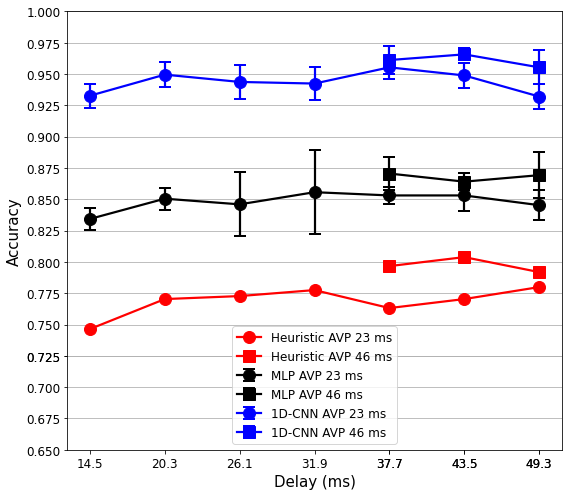

In [138]:
# Plot all

x = np.array([14.5,20.3,26.1,31.9,37.7,43.5,49.3,37.7,43.5,49.3])
markersize = 12
linewidth = 2.2

plt.figure(figsize=(8,7))
plt.plot(x[:7], heuristic_avp_aug[:7], 'ro-', markersize=markersize, linewidth=linewidth, label='Heuristic AVP 23 ms')
plt.plot(x[7:], heuristic_avp_aug[7:], 'rs-', markersize=markersize, linewidth=linewidth, label='Heuristic AVP 46 ms')
#plt.plot(x[:7], heuristic_avp_pca_aug[:7], 'ro-', markersize=markersize, linewidth=linewidth, label='Heuristic AVP PCA 23 ms')
#plt.plot(x[7:], heuristic_avp_pca_aug[7:], 'rs-', markersize=markersize, linewidth=linewidth, label='Heuristic AVP PCA 46 ms')
plt.errorbar(x[:7], mlp_avp[:7], yerr=mlp_avp_std[:7], fmt='ko-', markersize=markersize, linewidth=linewidth, capsize=6, capthick=2, label='MLP AVP 23 ms')
plt.errorbar(x[7:], mlp_avp[7:], yerr=mlp_avp_std[7:], fmt='ks-', markersize=markersize, linewidth=linewidth, capsize=6, capthick=2, label='MLP AVP 46 ms')
plt.errorbar(x[:7], rnn_avp[:7], yerr=rnn_avp_std[:7], fmt='bo-', markersize=markersize, linewidth=linewidth, capsize=6, capthick=2, label='1D-CNN AVP 23 ms')
plt.errorbar(x[7:], rnn_avp[7:], yerr=rnn_avp_std[7:], fmt='bs-', markersize=markersize, linewidth=linewidth, capsize=6, capthick=2, label='1D-CNN AVP 46 ms')
plt.xlabel('Delay (ms)', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.yticks([0.65,0.675,0.7,0.725,0.725,0.75,0.775,0.8,0.825,0.85,0.875,0.9,0.925,0.95,0.975,1], fontsize=12)
plt.xticks(x.tolist(), fontsize=12)
#plt.legend(loc=(0.32,0.01), prop={'size': 11.5})
plt.legend(loc='lower center', prop={'size': 12})
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('../../results/fig_online_classification_avp.pdf', format='pdf')
plt.show()

plt.close()

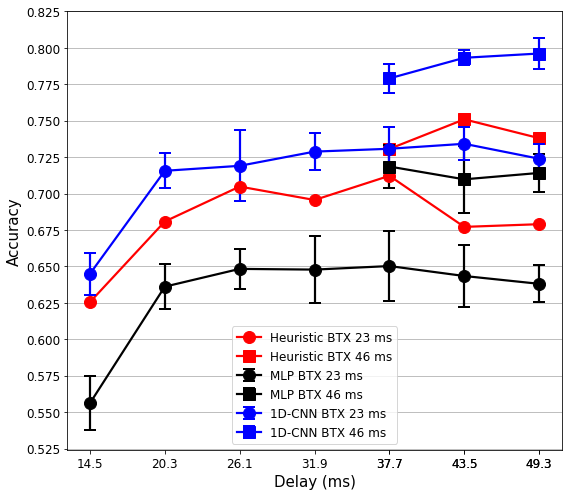

In [139]:
# Plot all

x = np.array([14.5,20.3,26.1,31.9,37.7,43.5,49.3,37.7,43.5,49.3])
markersize = 12
linewidth = 2.2

plt.figure(figsize=(8,7))
plt.plot(x[:7], heuristic_btx_aug[:7], 'ro-', markersize=markersize, linewidth=linewidth, label='Heuristic BTX 23 ms')
plt.plot(x[7:], heuristic_btx_aug[7:], 'rs-', markersize=markersize, linewidth=linewidth, label='Heuristic BTX 46 ms')
#plt.plot(x[:7], heuristic_btx_pca_aug[:7], 'ro-', markersize=markersize, linewidth=linewidth, label='Heuristic BTX PCA 23 ms')
#plt.plot(x[7:], heuristic_btx_pca_aug[7:], 'rs-', markersize=markersize, linewidth=linewidth, label='Heuristic BTX PCA 46 ms')
plt.errorbar(x[:7], mlp_btx[:7], yerr=mlp_btx_std[:7], fmt='ko-', markersize=markersize, linewidth=linewidth, capsize=6, capthick=2, label='MLP BTX 23 ms')
plt.errorbar(x[7:], mlp_btx[7:], yerr=mlp_btx_std[7:], fmt='ks-', markersize=markersize, linewidth=linewidth, capsize=6, capthick=2, label='MLP BTX 46 ms')
plt.errorbar(x[:7], rnn_btx[:7], yerr=rnn_btx_std[:7], fmt='bo-', markersize=markersize, linewidth=linewidth, capsize=6, capthick=2, label='1D-CNN BTX 23 ms')
plt.errorbar(x[7:], rnn_btx[7:], yerr=rnn_btx_std[7:], fmt='bs-', markersize=markersize, linewidth=linewidth, capsize=6, capthick=2, label='1D-CNN BTX 46 ms')
plt.xlabel('Delay (ms)', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.yticks([0.525,0.55,0.575,0.6,0.625,0.65,0.675,0.7,0.725,0.75,0.775,0.8,0.825], fontsize=12)
plt.xticks(x.tolist(), fontsize=12)
plt.legend(loc='lower center', prop={'size': 12})
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('../../results/fig_online_classification_btx.pdf', format='pdf')
plt.show()

plt.close()

In [ ]:
# Main Loop Heuristic Offline

methods = ['superflux','complex_flux','high_frequency_content','spectral_diff','spectral_flux','modified_kullback_leibler','phase_deviation','weighted_phase_deviation','normalized_weighted_phase_deviation','complex_domain','rectified_complex_domain']

ground_truth = np.load('../../data/interim/Onsets_Val_44K_Processed.npy')

fps = 172
num_thresholds = 100
thresholds = (np.arange(int(num_thresholds+2))/(num_thresholds+2))[1:-1]
window_lengths = [0.005,0.01,0.015,0.02,0.025,0.03]

pre_avg = np.array([0,1,2,4,7,12])
post_avg = np.array([0,1,2,4,7,12])
pre_max = np.array([0,1,2,4,7,12])
post_max = np.array([0,1,2,4,7,12])

min_activations = np.zeros(len(methods))
max_activations = np.zeros(len(methods))
f1_scores = np.zeros((len(methods),len(thresholds),len(pre_avg),len(post_avg),len(pre_max),len(post_max),len(window_lengths)))
for a in range(len(methods)):
    method = methods[a]
    detector = madmom.features.onsets.SpectralOnsetProcessor(onset_method=method,fps=fps)
    activation_function = detector('../../data/interim/Audio_Val_44K.wav')
    min_activations[a] = np.min(activation_function)
    max_activations[a] = np.max(activation_function)
    activation_function = (activation_function-min_activations[a])/(max_activations[a]-min_activations[a])
    print('Method = ' + method + ' | FPS = ' + str(fps))
    for b in range(len(thresholds)):
        for c in range(len(pre_avg)):
            for d in range(len(post_avg)):
                for e in range(len(pre_max)):
                    for f in range(len(post_max)):
                        threshold = thresholds[b]
                        #print('Method = ' + method + ' | Hop FPS = ' + str(fps) + ' | Threshold = ' + str(threshold))
                        pick_picker = madmom.features.onsets.OnsetPeakPickingProcessor(fps=fps,pre_avg=pre_avg[c],post_avg=post_avg[d],pre_max=pre_max[e],post_max=post_max[f],threshold=threshold)
                        onset_predictions = pick_picker(activation_function)
                        for g in range(len(window_lengths)):
                            window_length = window_lengths[g]
                            f1_scores[a,b,c,d,e,f,g], precision, recall = f_measure(ground_truth, onset_predictions, window=window_length)
                        #print(f1_scores[a,b,c,d,e,f])
np.save('../../results/f1_scores_heuristic_val', f1_scores)


indices_max = np.zeros((len(methods),5))
for a in range(len(methods)):
    max_f1 = 0
    for b in range(len(thresholds)):
        for c in range(len(pre_avg)):
            for d in range(len(post_avg)):
                for e in range(len(pre_max)):
                    for f in range(len(post_max)):
                        if np.mean(f1_scores[a,b,c,d,e,f])>max_f1:
                            max_f1 = np.mean(f1_scores[a,b,c,d,e,f])
                            scores_max = f1_scores[a,b,c,d,e,f]
                            indices_max[a] = np.array([b,c,d,e,f])
    print(scores_max)


ground_truth = (np.load('../../data/interim/Onsets_Test_44K.npy')-1024)/44100

f1_scores_test = np.zeros((len(methods),len(window_lengths)))
for a in range(len(methods)):
    method = methods[a]
    detector = madmom.features.onsets.SpectralOnsetProcessor(onset_method=method,fps=fps)
    threshold = thresholds[int(indices_max[a,0])]
    print('Method = ' + method + ' | Hop Size = ' + str(fps) + ' | Threshold = ' + str(threshold))
    pick_picker = madmom.features.onsets.OnsetPeakPickingProcessor(fps=fps,pre_avg=indices_max[a,1],post_avg=indices_max[a,2],pre_max=indices_max[a,3],post_max=indices_max[a,4],threshold=threshold)
    activation_function = detector('../../data/interim/Audio_Test_44K.wav')
    activation_function = (activation_function-min_activations[a])/(max_activations[a]-min_activations[a])
    onset_predictions = pick_picker(activation_function)
    for b in range(len(window_lengths)):
        window_length = window_lengths[b]
        f1_scores_test[a,b], precision, recall = f_measure(ground_truth, onset_predictions, window=window_length)
    print(f1_scores_test[a])
np.save('../../results/f1_scores_heuristic_test', f1_scores_test)

In [ ]:
'''audio = np.load('../../data/interim/Audio_TrainVal_44K.npy')
sf.write('../../data/interim/Audio_TrainVal_44K.wav', audio, 44100)

audio = np.load('../../data/interim/Audio_Test_44K.npy')
sf.write('../../data/interim/Audio_Test_44K.wav', audio, 44100)'''


'''cutoff = 5513
cutoff_samples = int(5513*44100)

ground_truth = (np.load('../../data/interim/Onsets_TrainVal_44K.npy')-1024)/44100
ground_truth = ground_truth[int(len(ground_truth)*0.8)+1:]
np.save('../../data/interim/Onsets_Val_44K_Processed.npy',ground_truth-cutoff)

audio = np.load('../../data/interim/Audio_TrainVal_44K.npy')[cutoff_samples:]
sf.write('../../data/interim/Audio_Val_44K.wav', audio, 44100)'''


'''ground_truth = np.load('../../data/interim/Classes_Test.npy')

hop_size_ms = 128/22050
factor = np.arange(len(ground_truth))*hop_size_ms
ground_truth = factor*ground_truth

j = np.where(ground_truth!=0)
ground_truth = ground_truth[j]

ground_truth = ground_truth[:ground_truth.argmax()]+(64/22050)
for s in range(len(ground_truth)-1):
    if ground_truth[s+1]<ground_truth[s]:
        print('ensuring monotonic ground_truth')
        ground_truth[s+1] = ground_truth[s]'''


'''audio_test = np.load('../../data/interim/Audio_Test_44K.npy')
plt.plot(audio_test[:100000])
for n in range(10):
    plt.axvline(x=ground_truth[n]*44100-1024)'''


'''x = np.array([5,10,15,20,25])

spl_1 = make_interp_spline(x, pretrained_rnn)
spl_2 = make_interp_spline(x, heuristic)
spl_3 = make_interp_spline(x, stateless_rnn)
spl_4 = make_interp_spline(x, stateful_rnn)

x_spl = np.linspace(x.min(), x.max(), 5)

pretrained_rnn_spl = spl_1(x_spl)
heuristic_spl = spl_2(x_spl)
stateless_rnn_spl = spl_3(x_spl)
stateful_rnn_spl = spl_4(x_spl)

plt.figure()
plt.plot(x_spl, heuristic_spl, label='Heuristic')
plt.plot(x_spl, pretrained_rnn_spl, label='Pretrained RNN')
plt.plot(x_spl, stateless_rnn_spl, label='Stateless RNN')
plt.plot(x_spl, stateful_rnn_spl, label='Stateful RNN')
plt.scatter(x, heuristic, marker='D')
plt.scatter(x, pretrained_rnn, marker='D')
plt.scatter(x, stateless_rnn, marker='D')
plt.scatter(x, stateful_rnn, marker='D')
plt.legend()
plt.show()'''

'''heuristic = np.array([0.0600572, 0.18255481, 0.51429933, 0.80600572, 0.85128694, 0.86224976])
#stateless_rnn = np.array([0.3836107554417414,0.7257030093734584,0.8345153664302599,0.8446647780925401,0.8573456352022713])
#stateful_rnn = np.array([0.7755757900374934,0.7947154471544716,0.8087741935483871,0.8147410358565738,0.8297435897435897])
pretrained_rnn = np.array([0.35959309, 0.62361013, 0.76318902, 0.80529927, 0.8133428,  0.82138633])
rnn_005 = np.array([0.43291676491393544,0.7082305449652387,0.7793427230046949,0.7945450480661748,0.8110887547507266,0.8146657724122512])
rnn_010 = np.array([0.34219958498396535,0.6868209730751063,0.8439971243709561,0.853032845840326,0.8638095238095237,0.8658420551855376])
rnn_015 = np.array([0.2647628267182962,0.555805857055089,0.8643700313177548,0.8744609487302348,0.8805151442880993,0.8817049808429118])
rnn_020 = np.array([0.20987311290173194,0.43035413153457,0.8609690771852933,0.878581835842642,0.8926060606060606,0.8955151515151515])
rnn_025 = np.array([0.17189651424016233,0.34739099356683345,0.8610074626865672,0.889897301170289,0.905705996131528,0.9083011583011582])
rnn_030 = np.array([0.14673814830431903,0.28856304985337244,0.8531403222040624,0.8789959744257636,0.9047734431790647,0.9112454655380895])'''